# Missing value imputation

In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
interest = pickle.load(open("interest.pickle"))

In [3]:
interest.shape

(338989, 30)

## Missing value

In [4]:
df = pd.concat([len(interest) - interest.count(), interest.dtypes], axis=1)
df.columns = ["Count of missing values", "dtype"]
df

,Count of missing values,dtype
X1,0,float64
X4,0,float64
X5,0,float64
X6,0,float64
X8,51866,float64
X9,51866,float64
X11,14794,float64
X13,51751,float64
X15,0,float64
X21,0,float64


**X25, X26 contains way too many missing values with respect to the total number of data. Remove**  

In [5]:
interest = interest.drop(["X25", "X26"], axis=1)

**Imputattion of missing values: group data by percentile intervals on X1 (target), use the mean of each group**

In [6]:
factor = pd.qcut(interest["X1"], 20)

## X8, loan grade (1,2,...,7 ); X9, loan subgrade (1,2,...,35)

**Let's look at X8 first:**

**Distribution before imputation:**

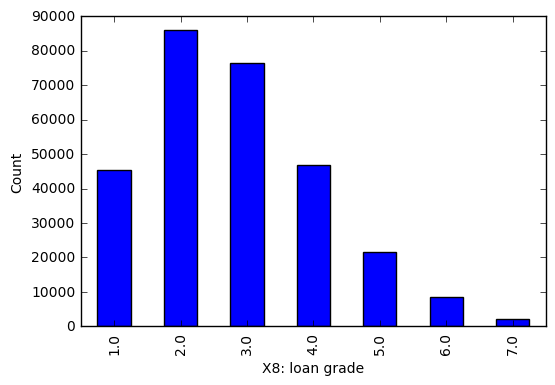

In [7]:
interest["X8"].value_counts().sort_index().plot(kind="bar")
plt.xlabel("X8: loan grade")
plt.ylabel("Count")
plt.show()

**"Conditional" mean of each group before imputation:**

In [8]:
group_mean = interest["X8"].groupby(factor).apply(np.mean)
group_mean.index = group_mean.index.astype(str)
group_mean

X1
[0.0542, 0.0712]    1.007339
(0.0712, 0.079]     1.000000
(0.079, 0.089]      1.010946
(0.089, 0.102]      1.941337
(0.102, 0.11]       2.003355
(0.11, 0.117]       2.015709
(0.117, 0.121]      2.008687
(0.121, 0.129]      2.081917
(0.129, 0.131]      2.302748
(0.131, 0.137]      2.736562
(0.137, 0.143]      2.805219
(0.143, 0.146]      3.026004
(0.146, 0.153]      3.061181
(0.153, 0.159]      3.288688
(0.159, 0.168]      3.492836
(0.168, 0.176]      3.760165
(0.176, 0.185]      4.054590
(0.185, 0.197]      4.304122
(0.197, 0.22]       4.919305
(0.22, 0.261]       5.807597
Name: X8, dtype: float64

In [9]:
factor.head()

0    (0.117, 0.121]
1     (0.102, 0.11]
2    (0.168, 0.176]
3    (0.129, 0.131]
4    (0.131, 0.137]
Name: X1, dtype: category
Categories (20, object): [[0.0542, 0.0712] < (0.0712, 0.079] < (0.079, 0.089] < (0.089, 0.102] ... (0.176, 0.185] < (0.185, 0.197] < (0.197, 0.22] < (0.22, 0.261]]

**Construct the Series for function Series.fillna()**

In [10]:
fillna_series = factor.map(lambda x: group_mean[x])
fillna_series.head()

0    2.008687
1    2.003355
2    3.760165
3    2.302748
4    2.736562
Name: X1, dtype: category
Categories (20, float64): [1.007339 < 1.000000 < 1.010946 < 1.941337 ... 4.054590 < 4.304122 < 4.919305 < 5.807597]

**Replace NA values with conidtional mean:**

In [11]:
interest["X8"] = interest["X8"].fillna(fillna_series).map(np.round)

**Distribution after imputation:**

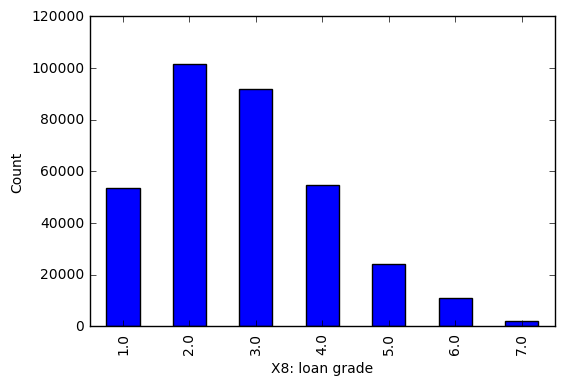

In [12]:
interest["X8"].value_counts().sort_index().plot(kind="bar")
plt.xlabel("X8: loan grade")
plt.ylabel("Count")
plt.show()

**"Conditional" mean of each group before imputation:**

In [13]:
group_mean = interest["X8"].groupby(factor).apply(np.mean)
group_mean.index = group_mean.index.astype(str)
group_mean

X1
[0.0542, 0.0712]    1.006201
(0.0712, 0.079]     1.000000
(0.079, 0.089]      1.009262
(0.089, 0.102]      1.950419
(0.102, 0.11]       2.002857
(0.11, 0.117]       2.013363
(0.117, 0.121]      2.007400
(0.121, 0.129]      2.069243
(0.129, 0.131]      2.255528
(0.131, 0.137]      2.776240
(0.137, 0.143]      2.835302
(0.143, 0.146]      3.022026
(0.146, 0.153]      3.051849
(0.153, 0.159]      3.244167
(0.159, 0.168]      3.417207
(0.168, 0.176]      3.797445
(0.176, 0.185]      4.046220
(0.185, 0.197]      4.258443
(0.197, 0.22]       4.932030
(0.22, 0.261]       5.836859
Name: X8, dtype: float64

**Repeat this procedure for X9:**

In [14]:
group_mean = interest["X9"].groupby(factor).apply(np.mean)
group_mean.index = group_mean.index.astype(str)
fillna_series = factor.map(lambda x: group_mean[x])
interest["X9"] = interest["X9"].fillna(fillna_series).map(np.round)

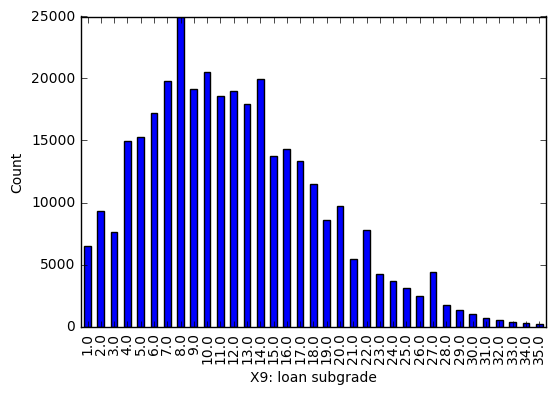

In [15]:
interest["X9"].value_counts().sort_index().plot(kind="bar")
plt.xlabel("X9: loan subgrade")
plt.ylabel("Count")
plt.show()

**Repeat this procedure for X11**

In [16]:
group_mean = interest["X11"].groupby(factor).apply(np.mean)
group_mean.index = group_mean.index.astype(str)
fillna_series = factor.map(lambda x: group_mean[x])
interest["X11"] = interest["X11"].fillna(fillna_series).map(np.round)

**Distribution after imputation**

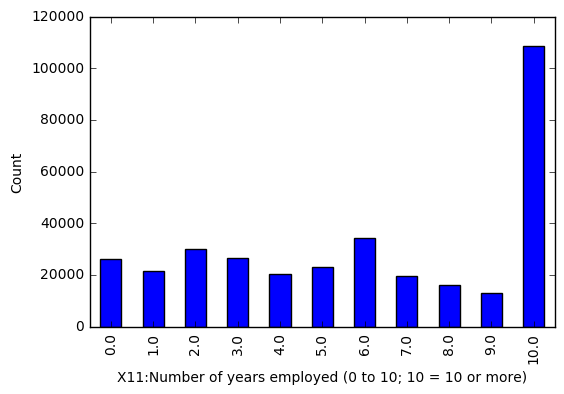

In [17]:
interest["X11"].value_counts().sort_index().plot(kind="bar")
plt.xlabel("X11:Number of years employed (0 to 10; 10 = 10 or more)")
plt.ylabel("Count")
plt.show()

**Repeat this procedure for X13**

In [18]:
group_mean = interest["X13"].groupby(factor).apply(np.mean)
group_mean.index = group_mean.index.astype(str)
fillna_series = factor.map(lambda x: group_mean[x])
interest["X13"] = interest["X13"].fillna(fillna_series).map(np.round)

**Repeat this procedure for X30**

In [19]:
group_mean = interest["X30"].groupby(factor).apply(np.mean)
group_mean.index = group_mean.index.astype(str)
fillna_series = factor.map(lambda x: group_mean[x])
interest["X30"] = interest["X30"].fillna(fillna_series).map(np.round)

In [20]:
df = pd.concat([len(interest) - interest.count(), interest.dtypes], axis=1)
df.columns = ["Count of missing values", "dtype"]
df

,Count of missing values,dtype
X1,0,float64
X4,0,float64
X5,0,float64
X6,0,float64
X8,0,float64
X9,0,float64
X11,0,float64
X13,0,float64
X15,0,float64
X21,0,float64


In [25]:
interest.shape

(338989, 28)